In [1]:
pwd

'C:\\Users\\woute\\Documents\\Reproduction_project\\HEAT_Reproduction'

In [2]:
import pickle
from plot import plot_graph_rplan, plot_polygons_rplan, plot_polygon
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection
from utils import ROOM_ARRAY_Z
import numpy as np
import shapely
from shapely.geometry import Polygon, MultiPolygon, Point
from PIL import Image

ImportError: cannot import name 'tens2img' from 'utils' (C:\Users\woute\Documents\Reproduction_project\HEAT_Reproduction\utils\__init__.py)

C:\Users\woute\AppData\Local\Temp\ipykernel_9576\840577373.py:8: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  polygon = pickle.load(open('../RPLAN/geometry/7.pickle', 'rb'))


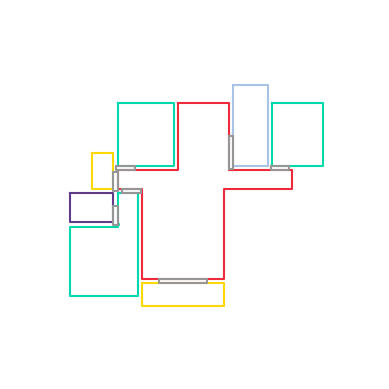

In [3]:
"""
This code prints a polygon as saved in the geometry files. I suspect that it only plot the edges of
the walls. It could maybe be possible to select the interior walls and print those. Or select the
interior and exterior walls and convert them to a annot.npy file.
"""
COLORS = [np.array(ROOM_ARRAY_Z[n][1])/255 for n in range(18)]

polygon = pickle.load(open('../RPLAN/geometry/7.pickle', 'rb'))

# fig, axs = plt.subplots(figsize=(250/DPI, 250/DPI), dpi=DPI)
fig, axs = plt.subplots()
# This makes the image based on the polygon input
plot_polygons_rplan(polygon, axs, colors=COLORS)

In [4]:
"""
Open annot.py file. and anot file is a special type of dictionary within an numpy array.
The annot is a dictionary with as keys the corners and corresponding value is a list of the corners
to which the key corner is connected. The annot files provide a list of interior and exterior walls.
"""
PATH_ANNOT = r'..\heat\data\s3d_floorplan\annot\00035.npy'
annot = np.load(PATH_ANNOT,allow_pickle=True)
print('annot is type:',type(annot))
print('annot_item is type:',type(annot.item()))
corner_connections = dict(annot.item())
print('corner_connections is type:',type(corner_connections))
corners = corner_connections.keys()

for corner in corners:
    print('corner at:',corner,'is connected to:',corner_connections[corner])


annot is type: <class 'numpy.ndarray'>
annot_item is type: <class 'collections.defaultdict'>
corner_connections is type: <class 'dict'>
corner at: (135.0, 233.0) is connected to: [(135, 197), (52.0, 233.0)]
corner at: (52.0, 233.0) is connected to: [(52, 197), (135.0, 233.0)]
corner at: (52, 197) is connected to: [(52.0, 130.0), (135, 197), (52.0, 233.0)]
corner at: (135, 197) is connected to: [(52, 197), (193, 197), (135.0, 233.0)]
corner at: (233, 145) is connected to: [(233.0, 197.0), (193, 145), (233.0, 100.0)]
corner at: (233.0, 100.0) is connected to: [(233, 145), (193.0, 100.0)]
corner at: (193.0, 100.0) is connected to: [(193, 36), (193, 107), (233.0, 100.0)]
corner at: (193, 107) is connected to: [(127, 107), (193, 145), (193, 100)]
corner at: (193, 145) is connected to: [(193, 197), (193, 107), (233, 145)]
corner at: (21.0, 36.0) is connected to: [(52, 36), (21.0, 107.0)]
corner at: (21.0, 107.0) is connected to: [(30, 107), (21.0, 36.0)]
corner at: (30, 107) is connected to:

In [5]:
polygon

([{0: <POLYGON ((116 64, 116 111, 115 111, 74 111, 74 124, 91 124, 91 186, 148 186...>,
   1: <POLYGON ((74 127, 74 148, 75 148, 75 149, 74 149, 74 150, 73 150, 41 150, 4...>,
   2: <POLYGON ((154 52, 154 108, 178 108, 178 52, 154 52))>,
   3: <POLYGON ((41 127, 41 147, 71 147, 71 127, 41 127))>,
   4: <POLYGON ((74 64, 74 108, 113 108, 113 64, 74 64))>,
   5: <POLYGON ((181 64, 181 108, 216 108, 216 64, 181 64))>,
   6: <POLYGON ((56 99, 56 124, 71 124, 71 99, 56 99))>,
   7: <POLYGON ((91 189, 91 205, 148 205, 148 189, 91 189))>},
  {0: <POLYGON ((151 87, 151 110, 154 110, 154 87, 151 87))>,
   1: <POLYGON ((73 108, 73 111, 86 111, 86 108, 73 108))>,
   2: <POLYGON ((180 108, 180 111, 193 111, 193 108, 180 108))>,
   3: <POLYGON ((71 112, 71 125, 74 125, 74 112, 71 112))>,
   4: <POLYGON ((77 124, 77 127, 90 127, 90 124, 77 124))>,
   5: <POLYGON ((71 136, 71 149, 74 149, 74 136, 71 136))>,
   6: <POLYGON ((103 186, 103 189, 136 189, 136 186, 103 186))>},
  {0: <POLYGON ((154 52, 154

C:\Users\woute\AppData\Local\Temp\ipykernel_9576\3820233575.py:7: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  polygon = pickle.load(open('../RPLAN/geometry/7.pickle', 'rb'))


9
POLYGON ((41 127, 41 147, 71 147, 71 127, 41 127))


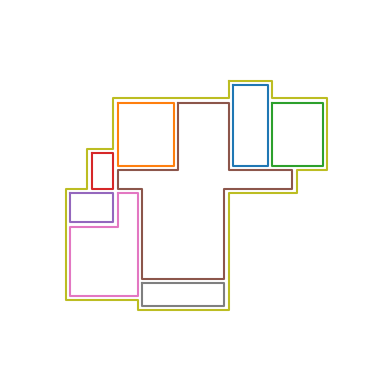

In [11]:
"""
The geometry files contain. A tuple, with infomation about the geometry of the rooms. Rooms are
notated as polygons. Which can be seperatly plotted with the plot_polygon function. We suspect
that only polygons of the wall_type are needed for the creation of a annot file.
"""
# first lets load a polygon
polygon = pickle.load(open('../RPLAN/geometry/7.pickle', 'rb'))

# first lets seperate a polygon type into its components:
room_polygons, room_types = polygon[0][0], polygon[1][0]
door_polygons, door_types = polygon[0][1], polygon[1][1]
wall_polygons, wall_types = polygon[0][2], polygon[1][2]

print(len(wall_polygons.keys()))
print(wall_polygons[4])
#create an image
fig1, ax = plt.subplots()
ax.imshow(np.zeros((256, 256)), alpha=0)
ax.axis('off')


# first let plot the walls
for key in wall_polygons.keys():
    plot_polygon(ax,wall_polygons[key])
    
# Lets create a polygon called wall_surface which indicates the wall eg between the rooms

To check the accuracy of the predicted labels (generated Annot files) a GT labels (geometry files) correspond to the. We simply check wether a the predicted corners and edges lie within the wall surface. The wall-surface is a surface from the Shapely module. This surface can 'hopefully' be crated using the wall-polygons. 
One easy to spot problem with this approach is the following:
- if the predicted corners and edges are all within one wall. Then the algoritm will label the predictions as correct while the geometry of the floorplan is compleetly incorrect.




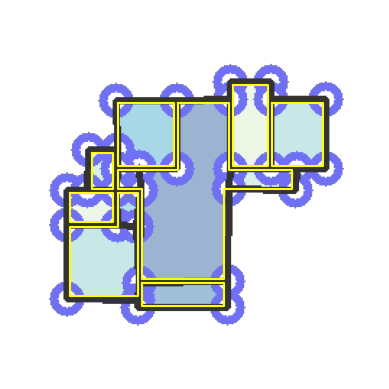

In [18]:
vis_prediction = np.asarray(Image.open('../heat/s3d_floorplan_eval/viz_heat_RPLAN_small/1_results.png'))
fig, ax = plt.subplots()
ax.imshow(vis_prediction, alpha=0.8)
ax.axis('off')

# first let plot the walls
for key in wall_polygons.keys():
    if key != 8:
        plot_polygon(ax,wall_polygons[key],c='yellow')

POLYGON ((151 49, 151 61, 150 61, 71 61, 71 96, 70 96, 53 96, 53 124, 52 124, 38 124, 38 201, 88 201, 88 208, 151 208, 151 127, 197 127, 198 127, 198 111, 218 111, 219 111, 219 61, 181 61, 181 49, 151 49), (148 124, 194 124, 195 124, 195 111, 151 111, 151 64, 116 64, 116 111, 115 111, 74 111, 74 124, 91 124, 91 186, 148 186, 148 124), (154 52, 154 108, 178 108, 178 52, 154 52), (74 127, 88 127, 88 198, 87 198, 41 198, 41 150, 73 150, 74 150, 74 127), (91 189, 91 205, 148 205, 148 189, 91 189), (56 99, 71 99, 71 124, 56 124, 56 99), (74 64, 74 108, 113 108, 113 64, 74 64), (181 64, 216 64, 216 108, 181 108, 181 64), (41 127, 41 147, 71 147, 71 127, 41 127))


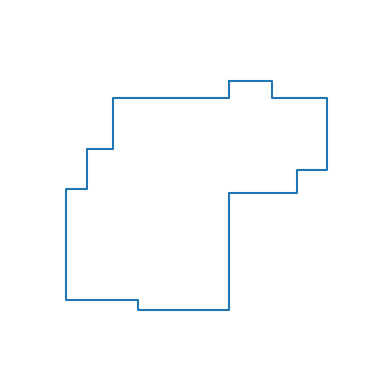

In [24]:
wall_surface = Polygon(shell=wall_polygons[8],holes=wall_polygons[0])
fig, ax = plt.subplots()
ax.imshow(np.zeros((256, 256)), alpha=0)
ax.axis('off')
plot_polygon(ax,wall_surface)